In [25]:
from zipfile import ZipFile
import random
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [26]:
with ZipFile('spaceship-titanic.zip', 'r') as zObject:
    zObject.extractall(path="dataset")

df = pd.read_csv("dataset/train.csv")

In [27]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [98]:
coloums_target = ["Transported", "CryoSleep", "Age", "VIP"]
filtered_df = df[coloums_target].copy()

In [99]:
filtered_df

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Transported,CryoSleep,Age,VIP
0,False,False,39.0,False
1,True,False,24.0,False
2,False,False,58.0,True
3,False,False,33.0,False
4,True,False,16.0,False
...,...,...,...,...
8688,False,False,41.0,True
8689,False,True,18.0,False
8690,True,False,26.0,False
8691,False,False,32.0,False


In [100]:
filtered_df["Age"] = filtered_df["Age"].fillna(filtered_df["Age"].median())
filtered_df["CryoSleep"].fillna(lambda x: random.choice(filtered_df[filtered_df["CryoSleep"] != np.nan]["CryoSleep"]), inplace =True)
filtered_df["VIP"].fillna(lambda x: random.choice(filtered_df[filtered_df["VIP"] != np.nan]["VIP"]), inplace =True)

In [101]:
for coloumn in ["CryoSleep", "VIP"]:
  filtered_df[coloumn] = filtered_df[coloumn].astype(bool)

In [102]:
filtered_df.head(5)

,Transported,CryoSleep,Age,VIP
0,False,False,39.0,False
1,True,False,24.0,False
2,False,False,58.0,True
3,False,False,33.0,False
4,True,False,16.0,False


<Axes: >

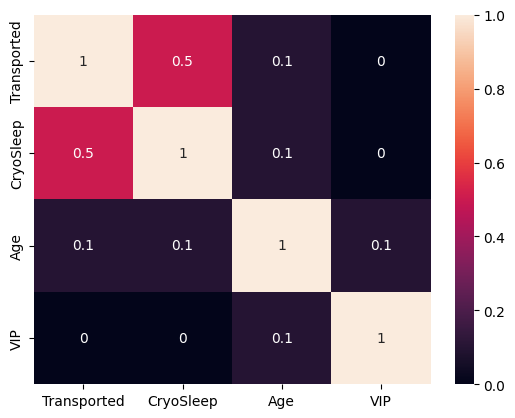

In [103]:
sns.heatmap(
  round(abs(filtered_df.corr()), 1,),
  annot=True,
)

In [104]:
train_input, test_input, train_output, test_output = train_test_split(
  filtered_df.drop("Transported", axis=1),
  filtered_df["Transported"],
  test_size=0.2
)

Точность модели на тестовом участке = 0.7439670394349618


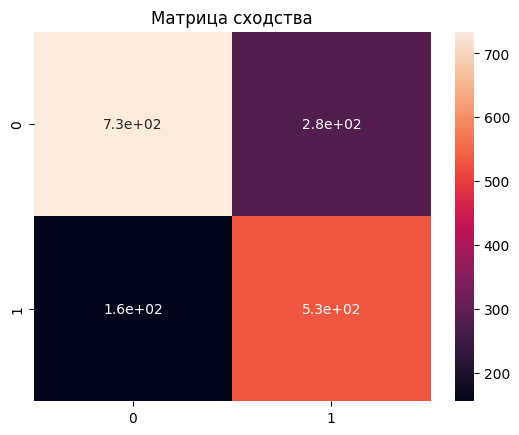

In [105]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)
sns.heatmap(
  confusion_matrix,
  annot=True
)
plt.title('Матрица сходства')
accuracy = metrics.accuracy_score(predictions, test_output)
print(f"Точность модели на тестовом участке = {accuracy}")

Text(0.5, 1.0, 'Дерево решений')

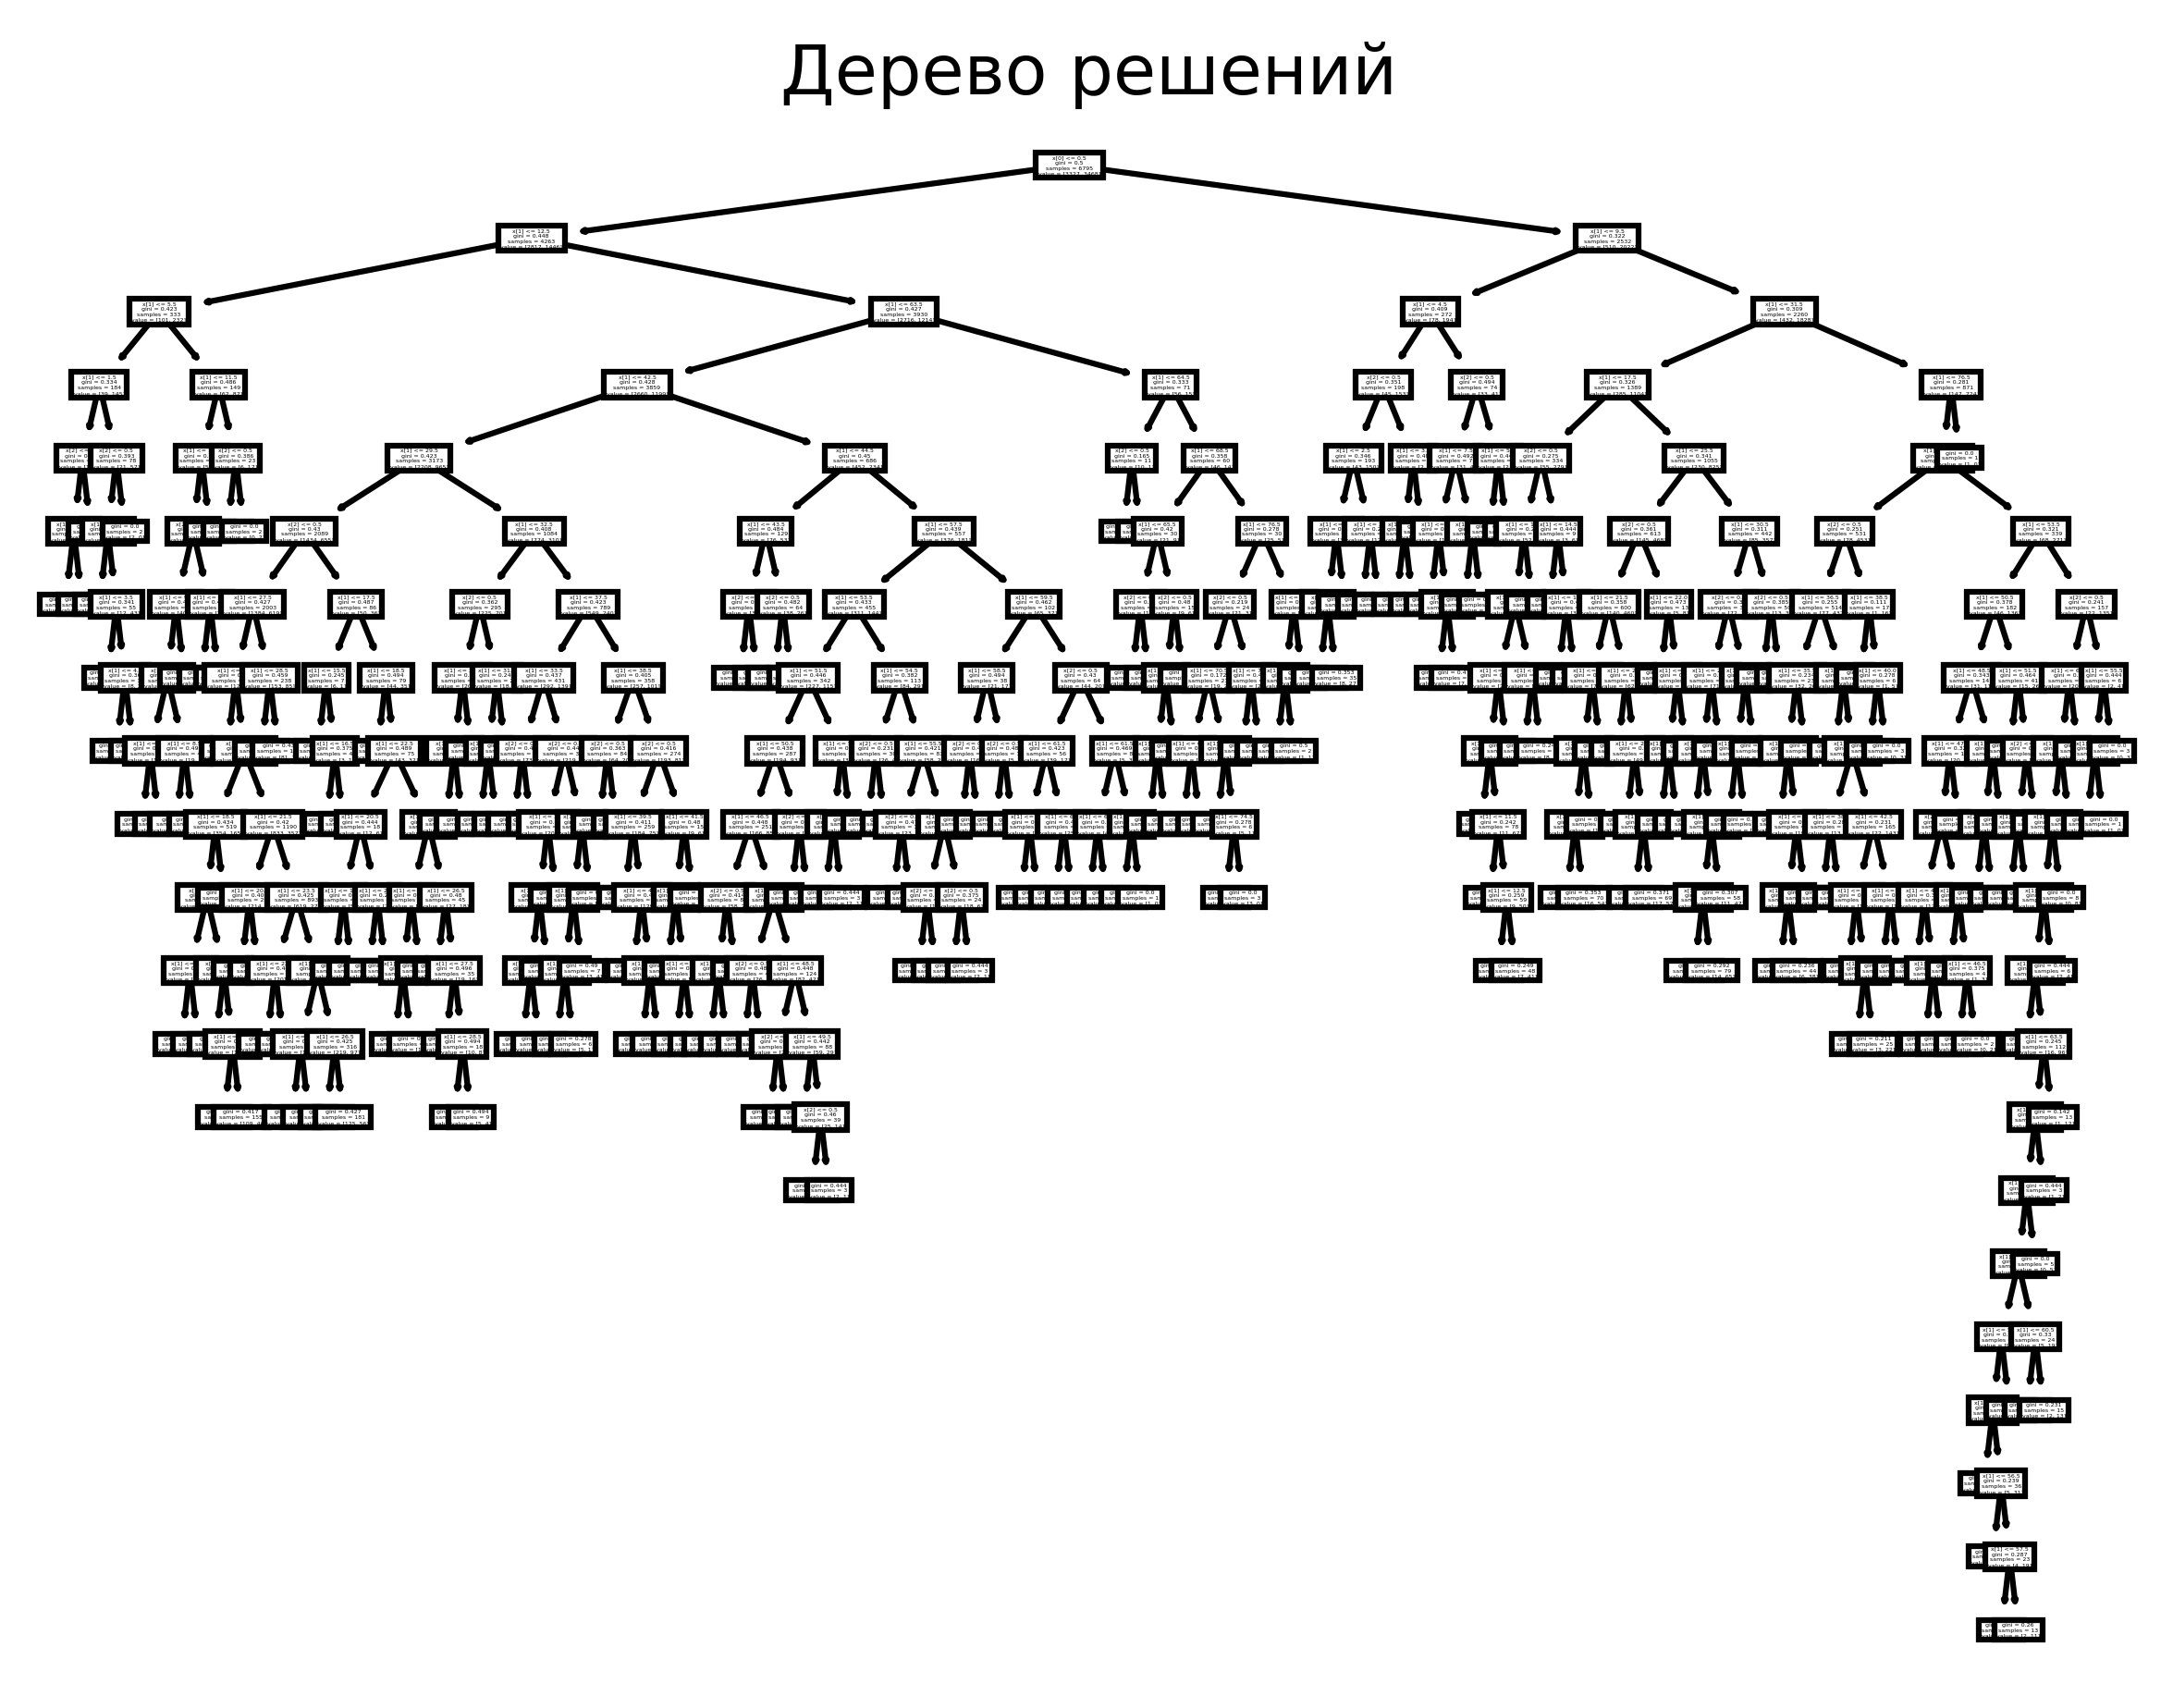

In [106]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")